In [1]:
#import EDA and visualizing tools:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # for heatmap

#machine learning tools:
#import sk-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

#Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix

# Preprocessing the dataset and drop the missing values

In [2]:
df = pd.read_excel("/content/drive/MyDrive/phase3.xlsx")
df.head()

,Student Nu,Team,Company,Company Site,Country,Foundations date,Type,Sector,Categories,Tags,Customer Segments,Value Propositions,Channels,Customer Relationships,Revenue Streams,Key Resources,Key Activities,Key Partnerships,Cost Structure,URL Address,BM Date,Customer Segments Tags,Value Propositions Tags,Channels Tags,Customer Relationships Tags,Revenue Streams Tags,Key Resources Tags,Key Activities Tags,Key Partnerships Tags,Cost Structure Tags
0,983623027,Amen,3RD Home,http://www.3rdhome.com/,Tennessee,2009,Private,Consumer Services,Travel,"luxury villas, Tours, lifestyle, experiences, ...",Owners of high-end luxury vacation homes | Tr...,To create the finest luxury second home exchan...,3rdhome.com.Live chat | Blog |Phone |Email |Tr...,Membership\nPremier home exchange experience\n...,$2500 Initiation Fee* |\nCommissions - the pri...,Over 8900 properties owned by householders |\n...,System Maintenance |\nUsers Support |\nCity pa...,Householders |\nVilla staff |\nInsurers |\nAff...,System maintenance |\nInsurance |\nStaff compe...,https://vizologi.com/business-strategy-canvas/...,NaN,niche | niche,performance | accessibility | price | accessib...,owned direct | owned direct | owned direct | o...,self service | co-creation | automated service...,initiation fee | brokerage fees,properties | facilities | staff,services | problem solving | marketing,supply chain | supply chain | resource acquisi...,variable cost | fixed cost
1,983623027,Amen,Expedia,https://www.expedia.com/,Washington,1996,Public,Consumer Services,Travel,"ticketing, travel, transportation, lodging pro...",Travelers for recreation or business |\nTouris...,Paperless itineraries |\nFast & easy booking |...,Websites |\nMobile App |\nApp store |\nGoogle ...,Travel fare aggregator websites and travel met...,"Advertising |\nCommissions (bookings, car rent...",The company operates more than 200 travel book...,Bid process |\nAdvertising services |\nCorpora...,Liberty Expedia Holdings owner |\nExpedia Affi...,Office |\nEmployees |\nCompensation |\nContrac...,https://vizologi.com/business-strategy-canvas/...,NaN,segmented | multi-sided,accessibility | convenience | convenience | ac...,owned direct | owned direct | owned direct | o...,automated service | self service | co-creation...,advertising | brokerage fees | brokerage fees,facilities | staff | facilities,problem solving | services | marketing | deve...,stakeholder | supply chain | partner | subsidi...,fixed cost | variable costs
2,983623027,Amen,Hapimag,http://www.hapimag.com/,Switzerland,1963,Private,Consumer Services,Travel,"tourism, investment, vacation properties, shar...",Members of the community,The business model of Hapimag is the following...,Website |\nApplication |\nTravel agencies |\nE...,A quality management system is to ensure the h...,They are depending on the country for a two-be...,Approximately 130'000 Shareholders and Members...,Management |\nFacilities Maintenance |\nServic...,Shareholders |\nFood suppliers |\nBedding Supp...,Real State |\nMaintenance |\nServices |\nEmplo...,https://vizologi.com/business-strategy-canvas/...,NaN,mass,newness | customization | accessibility,owned direct | owned direct | partner indirect...,co-creation | automated service | personal ass...,usage fee | usage fee | usage fee | usage fee,staff | links,services | development | network,stakeholder | supply chain | supply chain | pa...,fixed cost | variable costs | economy of scale
3,983623027,Amen,Marriott International,http://www.marriott.com/,Maryland,1927,Public,Consumer Services,Travel,"hospitality, tourism, luxury, hotels, resorts,...",Focus on business customers |\nPlus holiday ac...,Marriott International signs in at the top of ...,Hotels & Resorts\nWebsite\nTravel aggregators\...,Website\nOnline booking\nOn site location\nMar...,Booking\nAdditional services\nApplication fee ...,Brand |\nNearly 6000 hotels in 120 countries |...,Hotels & Resorts management\nFranchisees (prov...,Franchises (a broad portfolio of hotels an

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Student Nu                   1232 non-null   object
 1   Team                         839 non-null    object
 2   Company                      1177 non-null   object
 3   Company Site                 1175 non-null   object
 4   Country                      1179 non-null   object
 5   Foundations date             1177 non-null   object
 6   Type                         1177 non-null   object
 7   Sector                       1230 non-null   object
 8   Categories                   1177 non-null   object
 9   Tags                         1175 non-null   object
 10  Customer Segments            1139 non-null   object
 11  Value Propositions           1143 non-null   object
 12  Channels                     1172 non-null   object
 13  Customer Relationships       1166

In [4]:
df_droped_cols = df.drop(["Student Nu ",
                         "Team",
                         "Company Site",
                         "Foundations date",
                         "Customer Segments",
                         "Value Propositions",
                         "Channels",
                         "Customer Relationships",
                         "Revenue Streams",
                         "Key Resources",
                         "Key Activities",
                         "Key Partnerships",
                         "Cost Structure",
                         "URL Address",
                         "BM Date",
                         "Country",
                         "Type",
                         "Sector",
                         "Categories",
                         "Tags"],
                         axis=1)
df_droped_cols.head()

,Company,Customer Segments Tags,Value Propositions Tags,Channels Tags,Customer Relationships Tags,Revenue Streams Tags,Key Resources Tags,Key Activities Tags,Key Partnerships Tags,Cost Structure Tags
0,3RD Home,niche | niche,performance | accessibility | price | accessib...,owned direct | owned direct | owned direct | o...,self service | co-creation | automated service...,initiation fee | brokerage fees,properties | facilities | staff,services | problem solving | marketing,supply chain | supply chain | resource acquisi...,variable cost | fixed cost
1,Expedia,segmented | multi-sided,accessibility | convenience | convenience | ac...,owned direct | owned direct | owned direct | o...,automated service | self service | co-creation...,advertising | brokerage fees | brokerage fees,facilities | staff | facilities,problem solving | services | marketing | deve...,stakeholder | supply chain | partner | subsidi...,fixed cost | variable costs
2,Hapimag,mass,newness | customization | accessibility,owned direct | owned direct | partner indirect...,co-creation | automated service | personal ass...,usage fee | usage fee | usage fee | usage fee,staff | links,services | development | network,stakeholder | supply chain | supply chain | pa...,fixed cost | variable costs | economy of scale
3,Marriott International,niche | niche,performance | performance | customization | pe...,owned direct | owned direct | partner indirect...,self service | automated service | personal as...,usage fee | usage fee | licensing | usage fee,value | properties | staff | facilities,marketing | problem solving | platform | servi...,supply chain | subsidiary | partner | supply c...,economy of scale | fixed cost
4,Priceline,segmented | multi-sided,cost reduction | brand,owned direct | owned direct | owned direct | o...,automated service | self service | co-creation...,advertising | brokerage fees | brokerage fees,cooperation | value | advertisement | staff | ...,marketing | development | network | services,stakeholder | partner | supply chain | partner,economy of scale | fixed cost | variable cost


In [5]:
df_no_missing_values = df_droped_cols.dropna()

df_no_missing_values.head()

,Company,Customer Segments Tags,Value Propositions Tags,Channels Tags,Customer Relationships Tags,Revenue Streams Tags,Key Resources Tags,Key Activities Tags,Key Partnerships Tags,Cost Structure Tags
0,3RD Home,niche | niche,performance | accessibility | price | accessib...,owned direct | owned direct | owned direct | o...,self service | co-creation | automated service...,initiation fee | brokerage fees,properties | facilities | staff,services | problem solving | marketing,supply chain | supply chain | resource acquisi...,variable cost | fixed cost
1,Expedia,segmented | multi-sided,accessibility | convenience | convenience | ac...,owned direct | owned direct | owned direct | o...,automated service | self service | co-creation...,advertising | brokerage fees | brokerage fees,facilities | staff | facilities,problem solving | services | marketing | deve...,stakeholder | supply chain | partner | subsidi...,fixed cost | variable costs
2,Hapimag,mass,newness | customization | accessibility,owned direct | owned direct | partner indirect...,co-creation | automated service | personal ass...,usage fee | usage fee | usage fee | usage fee,staff | links,services | development | network,stakeholder | supply chain | supply chain | pa...,fixed cost | variable costs | economy of scale
3,Marriott International,niche | niche,performance | performance | customization | pe...,owned direct | owned direct | partner indirect...,self service | automated service | personal as...,usage fee | usage fee | licensing | usage fee,value | properties | staff | facilities,marketing | problem solving | platform | servi...,supply chain | subsidiary | partner | supply c...,economy of scale | fixed cost
4,Priceline,segmented | multi-sided,cost reduction | brand,owned direct | owned direct | owned direct | o...,automated service | self service | co-creation...,advertising | brokerage fees | brokerage fees,cooperation | value | advertisement | staff | ...,marketing | development | network | services,stakeholder | partner | supply chain | partner,economy of scale | fixed cost | variable cost


In [6]:
df_no_missing_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Company                      845 non-null    object
 1   Customer Segments Tags       845 non-null    object
 2   Value Propositions Tags      845 non-null    object
 3   Channels Tags                845 non-null    object
 4   Customer Relationships Tags  845 non-null    object
 5   Revenue Streams Tags         845 non-null    object
 6   Key Resources Tags           845 non-null    object
 7   Key Activities Tags          845 non-null    object
 8   Key Partnerships Tags        845 non-null    object
 9   Cost Structure Tags          845 non-null    object
dtypes: object(10)
memory usage: 72.6+ KB


In [7]:
df_no_missing_values.isna().sum()

Company                        0
Customer Segments Tags         0
Value Propositions Tags        0
Channels Tags                  0
Customer Relationships Tags    0
Revenue Streams Tags           0
Key Resources Tags             0
Key Activities Tags            0
Key Partnerships Tags          0
Cost Structure Tags            0
dtype: int64

In [8]:
#df_no_missing_values.to_excel("/content/drive/MyDrive/phase3_no_missing_value.xlsx")

# Visualizing Categories and Sectors

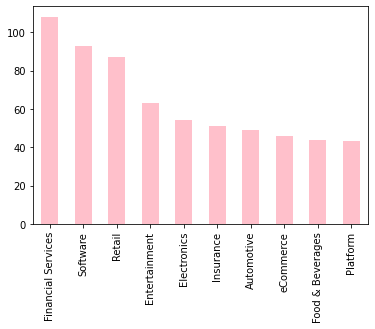

In [49]:
cat = df['Categories'].value_counts()[:10]
cat.plot(kind="bar", color="pink");

* Conclusion : The most common categories are Financial Services, Software and Retail



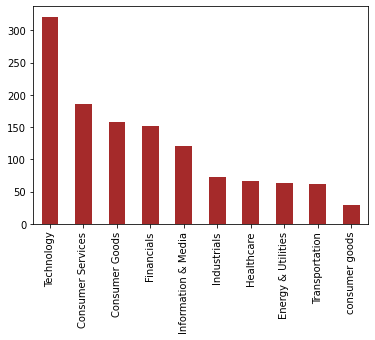

In [52]:
cat = df['Sector'].value_counts()[:10]
cat.plot(kind="bar", color="brown");

* Conclusion : The most common sectors are Technology, Consumer Services and Consumer Goods



# Visualizing the General Tags

### Checking the most repeated tag in Customer Segments Tags



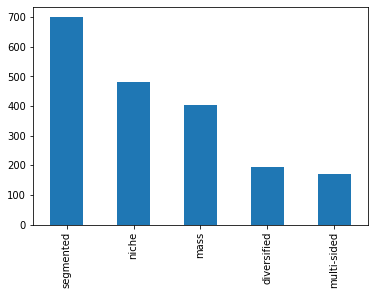

In [9]:
CST_value = df['Customer Segments Tags'].str.split(' | ').explode().value_counts()[1:6]
CST_value.plot(kind="bar");

As you see, `segmented` is the most common tag of customer segments tags of our dataframe

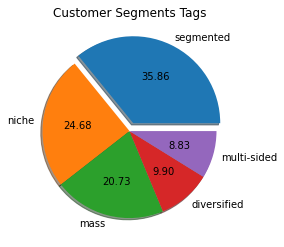

In [10]:
mylabels = ["segmented", "niche", "mass", "diversified", "multi-sided"]
myexplode = [0.1, 0, 0, 0, 0]

plt.pie(CST_value, labels = mylabels, explode = myexplode, shadow = True, autopct='%.2f')
plt.title("Customer Segments Tags")
plt.show()


* So now, we know the first of customer segments tags are segmented with 35.86% and second niche with 24.68%.

* It means most of companies grouped their customers by specific features.

### Checking the most repeated tag in Value Propositions Tags

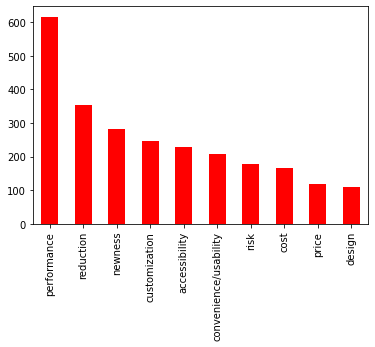

In [11]:
VP_value = df['Value Propositions Tags'].str.split(' | ').explode().value_counts()[1:11]
VP_value.plot(kind="bar", color=["red"]);

As you see, `performance` is the most common tag of value propositions tags of our dataframe

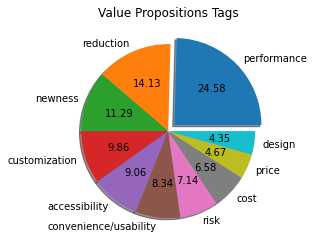

In [12]:
mylabels = ["performance", "reduction", "newness", "customization", "accessibility", "convenience/usability", "risk", "cost", "price", "design"]
myexplode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

plt.pie(VP_value, labels = mylabels, explode = myexplode, shadow = True, autopct='%.2f')
plt.title("Value Propositions Tags")
plt.show()


* So now, we know the first of Value Propositions Tags are performance with 24.58% and second reduction with 14.13%.

* It means most of companies try to increase the quality of their performence.

### Checking the most repeated tag in Channel Tags

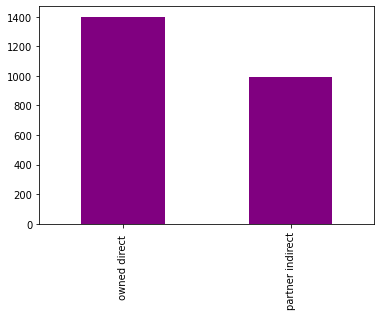

In [13]:
C_value = df['Channels Tags'].str.split('|').explode().value_counts()[1:3]
C_value.plot(kind="bar", color=["purple"]);


As you see, `owned direct` is the most common tag of channels tags of our dataframe

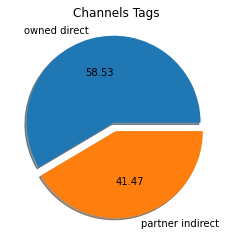

In [14]:
mylabels = ["owned direct", "partner indirect"]
myexplode = [0.1, 0]

plt.pie(C_value, labels = mylabels, explode = myexplode, shadow = True, autopct='%.2f')
plt.title("Channels Tags")
plt.show()


* So now, we know the first of Channels Tags are owned direct with 58.53% and second partner indirect with 41.47%.

* It means more than half of companies have the direct connection with their customers

### Checking the most repeated tag in Key Partnerships Tags

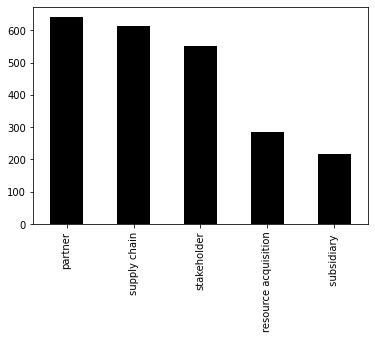

In [15]:
KP_value = df['Key Partnerships Tags'].str.split('|').explode().value_counts()[0:11]
KP_value.drop(labels=[' partner', ' supply chain ', ' resource acquisition ', ' stakeholder ', 'subsidiary', ' partner '], inplace =True)

KP_value.plot(kind="bar", color=["black"]);

As you see, `partner` and `supply chain`  is the most common tag of Key Partnerships tags of our dataframe

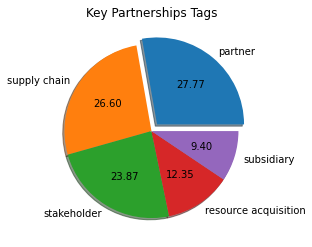

In [16]:
mylabels = ["partner", "supply chain", "stakeholder", "resource acquisition", "subsidiary"]
myexplode = [0.1, 0, 0, 0, 0 ]

plt.pie(KP_value, labels = mylabels, explode = myexplode, shadow = True, autopct='%.2f')
plt.title("Key Partnerships Tags")
plt.show()

* So now, we know the first of Key Partnerships Tags are partner with 27.77% and second supply chain with 26.60%.

* It means most of companies try to have cooperation with other companies and also use a chain to supply customers needs.

### Checking the most repeated tag in Revenue Streams Tags

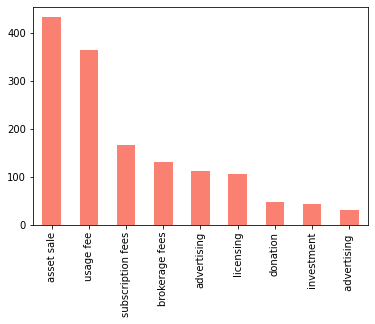

In [17]:
RS_value = df['Revenue Streams Tags'].str.split('|').explode().value_counts()[0:22]
RS_value.drop(labels=[' usage fee',
                      ' asset sale',
                      'asset sale ',
                      ' usage fee ',
                      ' asset sale ',
                      ' subscription fees',
                      'usage fee ',
                      'subscription fees ',
                      ' licensing',
                      ' licensing ',
                      ' brokerage fees',
                      ' subscription fees ',
                      ' brokerage fees '], inplace =True)

RS_value.plot(kind="bar", color=["salmon"]);

As you see, `asset sale` and `usage fee` is the most common tag of Revenue Streams tags of our dataframe

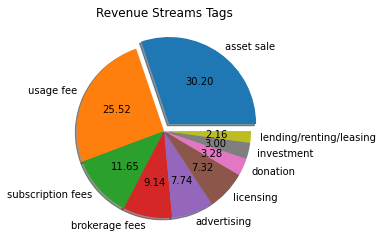

In [18]:
mylabels = ["asset sale",
            "usage fee",
            "subscription fees",
            "brokerage fees",
            "advertising",
            "licensing",
            "donation",
            "investment",
            "lending/renting/leasing"]
myexplode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0]

plt.pie(RS_value, labels = mylabels, explode = myexplode, shadow = True, autopct='%.2f')
plt.title("Revenue Streams Tags")
plt.show()

* So now, we know the first of Revenue Streams Tags are asset sale with 30.20% and second usage fee with 25.52%.

* It means more than half of companies revenue streams are from selling their products or make money from their services

# Visualizing non-general Tags

* Strategy: We will count the number of repeated tags and then the top most repeated tags will be used!

### Checking the most repeated tag in Customer Relationships Tags

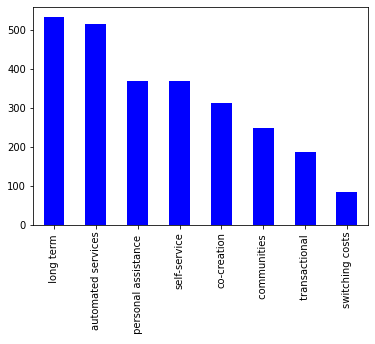

In [19]:
CR_value = df['Customer Relationships Tags'].str.split('|').explode().value_counts()[:20]
CR_value.drop(labels=['communities',
                      ' automated services',
                      'personal assistance',
                      ' self service ',
                      ' co-creation ',
                      ' automated services ',
                      'Long-term',
                      'transactional',
                      'long term',
                      'long-term',
                      'Self-service',
                      ' long-term ',
                      ' automated services'], inplace =True)
#because of using non unique typing tags! (lower case/upper case)
CR_value[3] = CR_value[3]+116
CR_value[5] = CR_value[5]+179+123
CR_value.sort_values(ascending =False,inplace=True)
CR_value.plot(kind="bar", color=["blue"]);

As you see, `long term` and `automated services` is the most common tag of Customer Relationships tags of our dataframe

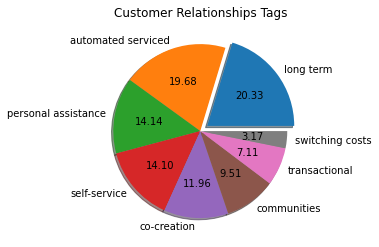

In [20]:
mylabels = ["long term",
            "automated serviced",
            "personal assistance",
            "self-service",
            "co-creation",
            "communities",
            "transactional",
            "switching costs"]
myexplode = [0.1, 0, 0, 0, 0, 0, 0, 0]

plt.pie(CR_value, labels = mylabels, explode = myexplode, shadow = True, autopct='%.2f')
plt.title("Customer Relationships Tags")
plt.show()

* So now, we know the first of Customer Relationships Tags are long term with 20.33% and second usage fee with 19.68%.

* It means companies' interactions with customers are disturbuted but the most one is long term

### Checking the most repeated tag in Key Resources Tags

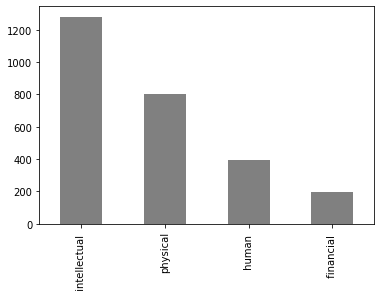

In [21]:
KR_value = df['Key Resources Tags'].str.split('|').explode().value_counts()[:15]
KR_value.drop(labels=['intellectual',
                      'Physical',
                      ' physical',
                      ' physical ',
                      ' property ',
                      'intellectual ',
                      'human',
                      'Intellectual Property',
                      ' intellectual-property ',
                      'Human',
                      ' intellectual'], inplace =True)
#because of using non unique typing tags! (lower case/upper case)
KR_value[1] = KR_value[1]+392
KR_value[0] = KR_value[0]+315+266+219
KR_value.sort_values(ascending =False,inplace=True)
KR_value.plot(kind="bar", color=["grey"]);

As you see, `intellectual`,`intellectual property` and `physical` are the most common tags of Key Recourses tags of our dataframe

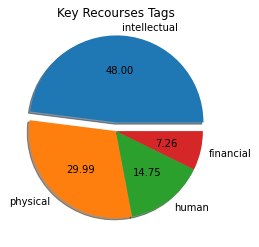

In [22]:
mylabels = ["intellectual",
            "physical",
            "human",
            "financial"]
myexplode = [0.1, 0, 0, 0]

plt.pie(KR_value, labels = mylabels, explode = myexplode, shadow = True, autopct='%.2f')
plt.title("Key Recourses Tags")
plt.show()

* So now, we know the first of Key Recourses Tags are intellectual(intellectual property) with 48.00% and second physical with 29.99%.

* It means companies' recourses mostly is intellectual and creativity

### Checking the most repeated tag in Key Activities Tags

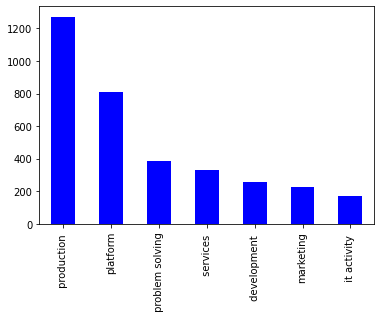

In [23]:
KA_value = df['Key Activities Tags'].str.split('|').explode().value_counts()[:17]

KA_value.drop(labels=['Production',
                      'services',
                      'production',
                      ' problem solving ',
                      ' marketing ',
                      'Platform/network',
                      ' platform/network ',
                      'Problem solving',
                      ' network/platform ',
                      'production '], inplace =True)
#because of using non unique typing tags! (lower case/upper case)
KA_value[0] = KA_value[0]+753
KA_value[3] = KA_value[3]+177+178+223
KA_value[5] = KA_value[5]+183

KA_value.sort_values(ascending =False,inplace=True)
KA_value.plot(kind="bar", color=["blue"]);

As you see, `production`is the most common tags of Key Activities tags of our dataframe

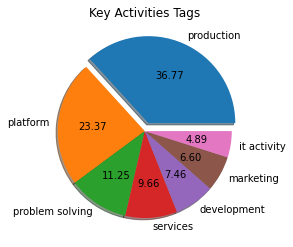

In [24]:
mylabels = ["production",
            "platform",
            "problem solving",
            "services",
            "development",
            "marketing",
            "it activity"]
myexplode = [0.1, 0, 0, 0, 0, 0, 0]

plt.pie(KA_value, labels = mylabels, explode = myexplode, shadow = True, autopct='%.2f')
plt.title("Key Activities Tags")
plt.show()

* So now, we know the first of Key Activities Tags are production with 36.77% and second platform with 23.37%.

* It means most of activities of companies are about production and create channel or platform to make a connection between customers and their markets

### Checking the most repeated tag in Cost Structure Tags

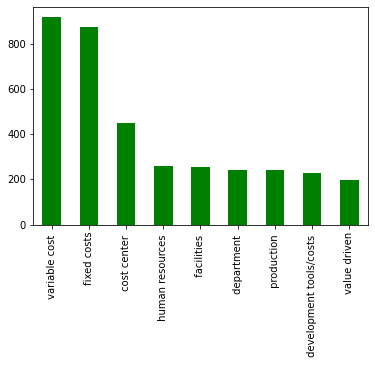

In [25]:
CS_value = df['Cost Structure Tags'].str.split('|').explode().value_counts()[:11]

CS_value.drop(labels=['Fixed cost',
                      'Variable cost'], inplace =True)

#because of using non unique typing tags! (lower case/upper case)
CS_value[1] = CS_value[1]+435
CS_value[2] = CS_value[2]+321
CS_value[2] = CS_value[2]+321

CS_value.sort_values(ascending =False,inplace=True)
CS_value.plot(kind="bar", color=["green"]);

Thease are the top repeated tags but as you can guess it needs some EDA!!!
So we want clustering them into 2 clusters: Fixed or Variable Costs

In [26]:
CS_value_edited=[]
CS_value_edited.append(CS_value[2]+CS_value[3]+CS_value[4])
CS_value_edited.append(CS_value[5]+CS_value[6]+CS_value[7]+CS_value[8])

CS_value_edited.sort(reverse=True)

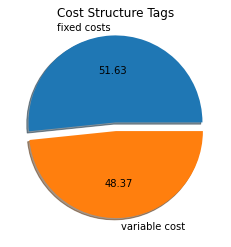

In [27]:
mylabels = ["fixed costs",
            "variable cost"]
myexplode = [0.1, 0]

plt.pie(CS_value_edited, labels = mylabels, explode = myexplode, shadow = True, autopct='%.2f')
plt.title("Cost Structure Tags")
plt.show()

* So now, we know the first of Cost Structure Tags are fixed costs with 51.63% and second variable cost with 48.37%.

* It means more than half of companies costs are for fixed costs like salary of employees, taxes, bills and etc.

## Try to prepare Data for traning a model

In [28]:
#store the most repeated tags of whole of dataset
the_most_repeated_tags=["segmented",
 "niche",
 "mass",
 "diversified",
 "multi-sided",
 "performance",
 "reduction",
 "newness",
 "customization",
 "accessibility",
 "convenience/usability",
 "risk",
 "cost",
 "price",
 "design",
 "owned direct",
 "partner indirect",
 "partner",
 "supply chain",
 "stakeholder",
 "resource acquisition",
 "subsidiary",
 "asset sale",
 "usage fee",
 "subscription fees",
 "brokerage fees",
 "advertising",
 "licensing",
 "donation",
 "investment",
 "lending/renting/leasing", "long term",
 "automated services",
 "personal assistance",
 "self-service",
 "co-creation",
 "communities",
 "transactional",
 "switching costs",
 "intellectual",
 "physical",
 "human",
 "financial",
 "production",
 "platform",
 "problem solving",
 "services",
 "development",
 "marketing",
 "it activity",
 "fixed costs",
 "variable cost"]

In [29]:
len(the_most_repeated_tags)

52

In [30]:
#creating a dataframe of zero, later it will be used for us!
new_dataframe=pd.DataFrame()
for i in the_most_repeated_tags:
  new_dataframe[str(i)]=np.zeros(1500)

new_dataframe.insert(0, "Company" ,df["Company"])
new_dataframe["Type"]=np.zeros(1500)

#convert categorical values into numeric
def encoderData():
  #type:
  ctr=0
  for i in df["Type"]:
    if type(i)== str:
      if ("Public" in i) or ("public" in i):
        new_dataframe.at[ctr, 'Type'] = 1
      elif ("Subsidiary" in i) or ("subsidiary" in i):
        new_dataframe.at[ctr, 'Type'] = 2
      elif ("State-owned" in i) or ("state-owned" in i):
        new_dataframe.at[ctr, 'Type'] = 3
      elif ("non-profit" in i) or ("Nonprofit" in i):
        new_dataframe.at[ctr, 'Type'] = 4
      ctr+=1

  #Customer segments:
  ctr1=0
  for i in df["Customer Segments Tags"]:
    if type(i)== str:
      if "segmented" in i:
        new_dataframe.at[ctr1, 'segmented'] += 1
      if "niche" in i:
        new_dataframe.at[ctr1, 'niche'] += 1
      if "mass" in i:
        new_dataframe.at[ctr1, 'mass'] += 1
      if "diversified" in i:
        new_dataframe.at[ctr1, 'diversified'] += 1
      if "multi-sided" in i:
        new_dataframe.at[ctr1, 'multi-sided'] += 1
      ctr1+=1

  #value propositions:
  ctr2=0
  for i in df["Value Propositions Tags"]:
    if type(i)== str:
      if "performance" in i:
        new_dataframe.at[ctr2, 'performance'] += 1
      if "reduction" in i:
        new_dataframe.at[ctr2, 'reduction'] += 1
      if "newness" in i:
        new_dataframe.at[ctr2, 'newness'] += 1
      if "customization" in i:
        new_dataframe.at[ctr2, 'customization'] += 1
      if "accessibility" in i:
        new_dataframe.at[ctr2, 'accessibility'] += 1
      if "convenience/usability" in i:
        new_dataframe.at[ctr2, 'convenience/usability'] += 1
      if "risk" in i:
        new_dataframe.at[ctr2, 'risk'] += 1
      if "cost" in i:
        new_dataframe.at[ctr2, 'cost'] += 1
      if "price" in i:
        new_dataframe.at[ctr2, 'price'] += 1
      if "design" in i:
        new_dataframe.at[ctr2, 'design'] += 1
      ctr2+=1

  #Channels:
  ctr3=0
  for i in df["Channels Tags"]:
    if type(i)== str:
      if "owned direct" in i:
        new_dataframe.at[ctr3, 'owned direct'] += 1
      if "partner indirect" in i:
        new_dataframe.at[ctr3, 'partner indirect'] += 1
      ctr3+=1

  #Key Partnerships:
  ctr4=0
  for i in df["Key Partnerships Tags"]:
    if type(i)== str:
      if "partner" in i:
        new_dataframe.at[ctr4, 'partner'] += 1
      if "supply chain" in i:
        new_dataframe.at[ctr4, 'supply chain'] += 1
      if "stakeholder" in i:
        new_dataframe.at[ctr4, 'stakeholder'] += 1
      if "resource acquisition" in i:
        new_dataframe.at[ctr4, 'resource acquisition'] += 1
      if "subsidiary" in i:
        new_dataframe.at[ctr4, 'subsidiary'] += 1
      ctr4+=1

  #Revenue Streams:
  ctr5=0
  for i in df["Revenue Streams Tags"]:
    if type(i)== str:
      if "asset sale" in i:
        new_dataframe.at[ctr5, 'asset sale'] += 1
      if "usage fee" in i:
        new_dataframe.at[ctr5, 'usage fee'] += 1
      if "subscription fees" in i:
        new_dataframe.at[ctr5, 'subscription fees'] += 1
      if "brokerage fees" in i:
        new_dataframe.at[ctr5, 'brokerage fees'] += 1
      if "advertising" in i:
        new_dataframe.at[ctr5, 'advertising'] += 1
      if "licensing" in i:
        new_dataframe.at[ctr5, 'licensing'] += 1
      if "donation" in i:
        new_dataframe.at[ctr5, 'donation'] += 1
      if "investment" in i:
        new_dataframe.at[ctr5, 'investment'] += 1
      if "lending/renting/leasing" in i:
        new_dataframe.at[ctr5, 'lending/renting/leasing'] += 1
      ctr5+=1

  #Customer Relationships:
  ctr6=0
  for i in df["Customer Relationships Tags"]:
    if type(i)== str:
      if "long term" in i:
        new_dataframe.at[ctr6, 'long term'] += 1
      if "automated services" in i:
        new_dataframe.at[ctr6, 'automated services'] += 1
      if "personal assistance" in i:
        new_dataframe.at[ctr6, 'personal assistance'] += 1
      if "self-service" in i:
        new_dataframe.at[ctr6, 'self-service'] += 1
      if "co-creation" in i:
        new_dataframe.at[ctr6, 'co-creation'] += 1
      if "communities" in i:
        new_dataframe.at[ctr6, 'communities'] += 1
      if "transactional" in i:
        new_dataframe.at[ctr6, 'transactional'] += 1
      if "switching costs" in i:
        new_dataframe.at[ctr6, 'switching costs'] += 1
      ctr6+=1

  #Key Resources:
  ctr7=0
  for i in df["Key Resources Tags"]:
    if type(i)== str:
      if "intellectual" in i:
        new_dataframe.at[ctr7, 'intellectual'] += 1
      if "physical" in i:
        new_dataframe.at[ctr7, 'physical'] += 1
      if "human" in i:
        new_dataframe.at[ctr7, 'human'] += 1
      if "financial" in i:
        new_dataframe.at[ctr7, 'financial'] += 1
      ctr7+=1

  #Key Activities:
  ctr8=0
  for i in df["Key Activities Tags"]:
    if type(i)== str:
      if "production" in i:
        new_dataframe.at[ctr8, 'production'] += 1
      if "platform" in i:
        new_dataframe.at[ctr8, 'platform'] += 1
      if "problem solving" in i:
        new_dataframe.at[ctr8, 'problem solving'] += 1
      if "services" in i:
        new_dataframe.at[ctr8, 'services'] += 1
      if "development" in i:
        new_dataframe.at[ctr8, 'development'] += 1
      if "marketing" in i:
        new_dataframe.at[ctr8, 'marketing'] += 1
      if "it activity" in i:
        new_dataframe.at[ctr8, 'it activity'] += 1
      ctr8+=1

  #Cost Structure:
  ctr9=0
  for i in df["Cost Structure Tags"]:
    if type(i)== str:
      if ("fixed costs" in i) or ("cost center" in i) or ("human resources" in i) or ("facilities" in i):
        new_dataframe.at[ctr9, 'fixed costs'] += 1
      if ("variable cost" in i) or ("department" in i) or ("production" in i) or ("development tools/costs" in i) or ("value driven" in i):
        new_dataframe.at[ctr9, 'variable cost'] += 1
    ctr9+=1

In [31]:
encoderData()
new_dataframe.head()

,Company,segmented,niche,mass,diversified,multi-sided,performance,reduction,newness,customization,accessibility,convenience/usability,risk,cost,price,design,owned direct,partner indirect,partner,supply chain,stakeholder,resource acquisition,subsidiary,asset sale,usage fee,subscription fees,brokerage fees,advertising,licensing,donation,investment,lending/renting/leasing,long term,automated services,personal assistance,self-service,co-creation,communities,transactional,switching costs,intellectual,physical,human,financial,production,platform,problem solving,services,development,marketing,it activity,fixed costs,variable cost,Type
0,3RD Home,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Expedia,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
2,Hapimag,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Marriott International,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
4,Priceline,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0


#### Keys for type

* Private >> 0

* Public >> 1

* Subsidiary >> 2

* State-owned >> 3

* Non-profit >> 4          

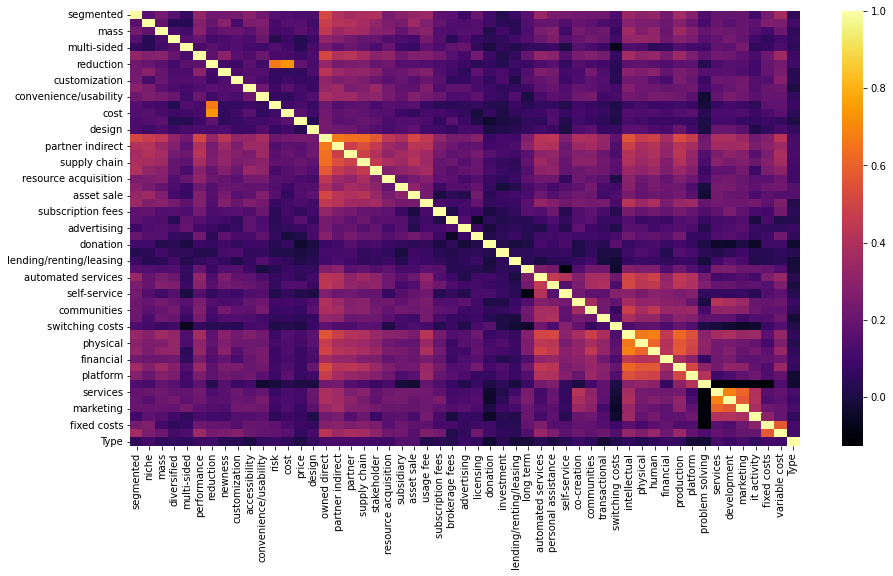

In [32]:
#Correlation matrix

fig = plt.subplots(figsize=(15,8))

sns.heatmap(new_dataframe.corr(),
            cmap="inferno");

In [33]:
#Split data into X/y
X = new_dataframe.drop(["Company", "Type"], axis=1)
y = new_dataframe["Type"]

#Split into train and test parts
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [34]:
#create function to fit and evaluate models
models={"LogisticRegression":LogisticRegression(),
       "RandomForestClassifier":RandomForestClassifier(),
       "KNeighborsClassifier":KNeighborsClassifier(),
       "SVM":svm.SVC(),
       "Decision Tree_CLF":DecisionTreeClassifier()}

def fit_and_score(models, X_train,X_test,y_train,y_test):
    scores={}
    for name,model in models.items():
        mdl=model.fit(X_train,y_train)
        scores[name]=mdl.score(X_test,y_test)
        
    return scores

In [35]:
#try to train models
model_scoring = fit_and_score(models=models, X_train=X_train, X_test=X_test,y_train=y_train,y_test=y_test)
model_scoring

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'Decision Tree_CLF': 0.5633333333333334,
 'KNeighborsClassifier': 0.63,
 'LogisticRegression': 0.56,
 'RandomForestClassifier': 0.6366666666666667,
 'SVM': 0.65}

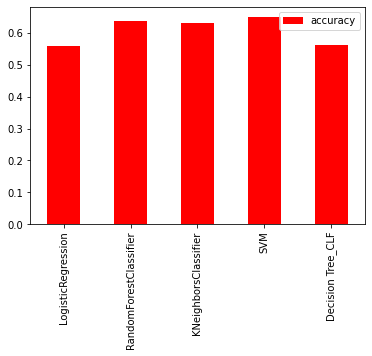

In [36]:
#visualizing the results
model_comparing = pd.DataFrame(model_scoring, index=["accuracy"])
model_comparing.T.plot.bar(color="red");

So, We are going to choose Random Forest Classifier model to tune hyperprameters to get better result :)

In [37]:
#RandomForestClassifier grid for tuning hyperprameters
rf_grid = {"n_estimators":np.arange(10,2000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

In [38]:
#RandomForestClassifier RandomizedSearchCV
rs_rf=RandomizedSearchCV(estimator=RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,   60,  110,  160,  210,  260,  310,  360,  410,  460,  510,
        560,  610,  660,  710,  760,  810,  860,  910,  960, 1010, 1060,
       1110, 1160, 1210, 1260, 1310, 1360, 1410, 1460, 1510, 1560, 1610,
       1660, 1710, 1760, 1810, 1860, 1910, 1960])},
                   verbose=True)

In [39]:
rs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 1010}

In [40]:
rs_rf.score(X_test, y_test)

0.6533333333333333

In [41]:
print(classification_report(y_test,
                      rs_rf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.65      0.96      0.78       182
         1.0       0.68      0.25      0.37        83
         2.0       0.00      0.00      0.00        26
         3.0       0.00      0.00      0.00         6
         4.0       0.00      0.00      0.00         3

    accuracy                           0.65       300
   macro avg       0.27      0.24      0.23       300
weighted avg       0.58      0.65      0.57       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Unfortunately tunning the hyperprameters has bad effect!
* So let's back

In [42]:
mdl = RandomForestClassifier().fit(X_train,y_train)
print(classification_report(y_test,
                      mdl.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.66      0.92      0.77       182
         1.0       0.59      0.33      0.42        83
         2.0       0.00      0.00      0.00        26
         3.0       0.00      0.00      0.00         6
         4.0       0.00      0.00      0.00         3

    accuracy                           0.65       300
   macro avg       0.25      0.25      0.24       300
weighted avg       0.57      0.65      0.58       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


WE HAVE DONE IT! =)

GOOD LUCK!